In [3]:
import numpy as np

In [8]:
import matplotlib.pyplot as plt

# Parameters
m = 1.0  # Mass
k = 1.0  # Spring constant

# Time parameters
t_start = 0
t_end = 200
dt = 0.0001

# Initial conditions
initial_position = 1.0
initial_velocity = 0.0

In [15]:
# Function to integrate equations of motion using Euler method
def integrate_motion(initial_position, initial_velocity, t_start, t_end, dt, alph=1, kb=1, Temp=120, Q=0.5):
    t_values = np.arange(t_start, t_end, dt)
    x_values = []
    v_values = []

    x = initial_position
    v = initial_velocity
    for t in t_values:
        x_values.append(x)
        v_values.append(v)
        a = (-k/m) * x - alph * v
        v += a * dt
        x += v * dt + a * dt * dt/2
        alph += (dt/Q) * (m*v*v/2 - kb*Temp)

    return x_values, v_values

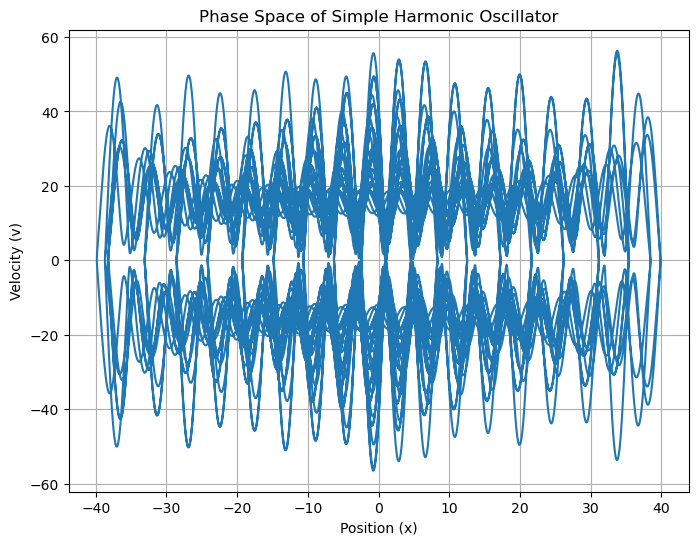

In [16]:
# Generate phase space diagram
x_values, v_values = integrate_motion(initial_position, initial_velocity, t_start, t_end, dt)

plt.figure(figsize=(8, 6))
plt.title('Phase Space of Simple Harmonic Oscillator')
plt.xlabel('Position (x)')
plt.ylabel('Velocity (v)')
plt.plot(x_values, v_values)
plt.grid(True)
plt.show()

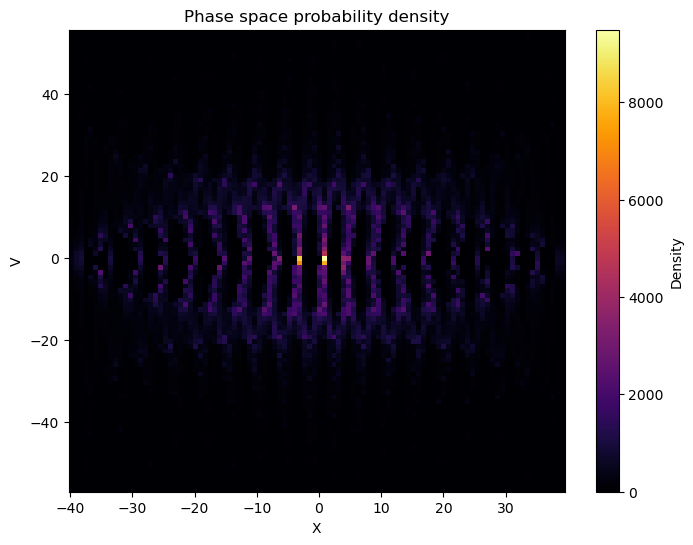

In [17]:
grid_size = 100

# Create 2D histogram
hist, xedges, yedges = np.histogram2d(x_values, v_values, bins=grid_size)

# Create grid for plotting
xgrid, ygrid = np.meshgrid(xedges[:-1], yedges[:-1])

# Plot density
plt.figure(figsize=(8, 6))
plt.title('Phase space probability density')
plt.xlabel('X')
plt.ylabel('V')
plt.pcolormesh(xgrid, ygrid, hist.T, cmap='inferno')
plt.colorbar(label='Density')
plt.show()
